In [0]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

#import numpy as np 
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the jupyter notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots
import missingno as ms #visualize missing data

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')


In [0]:
#load the datasets
df_city_data = pd.read_csv("city_data.csv")
df_global_data = pd.read_csv("global_data.csv")
df_city_list = pd.read_csv("city_list.csv")

In [5]:
#checking the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [6]:
#checking the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


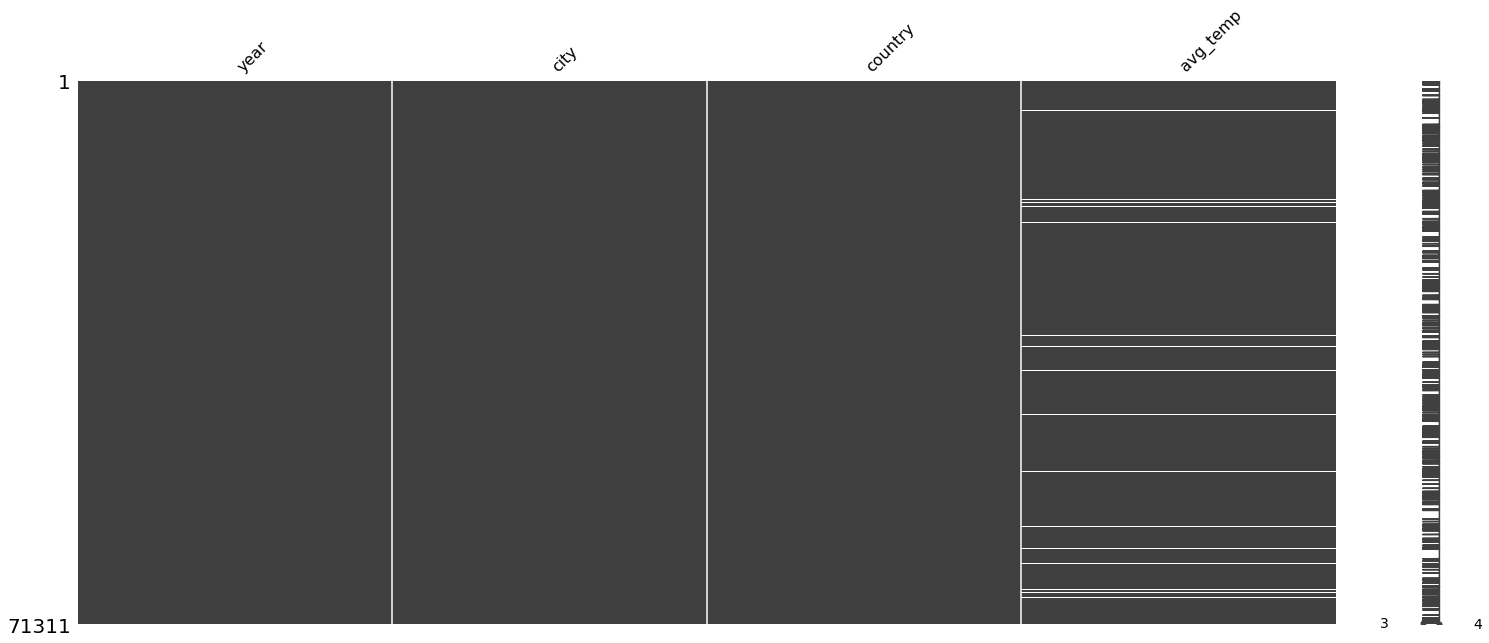

In [7]:
#plot missing values
ms.matrix(df_city_data)

In [8]:
#caluclate missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

In [9]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]["city"].unique())

235

In [10]:
#checking the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [11]:
#checking the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [12]:
#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].min())
print(df_global_data["avg_temp"].min())

1750
5.78


In [13]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].max())
print(df_global_data["avg_temp"].max())

2015
9.83


In [14]:
#select the cities from germany out of the city_list dataframe
df_city_list[df_city_list["country"] == "Germany"]

,city,country
42,Berlin,Germany
113,Hamburg,Germany
214,Munich,Germany


In [0]:
#create a new reference to the city_data dataframe for the city "Berlin"
df_berlin = df_city_data[df_city_data["city"] == "Berlin"]

In [16]:
#checking the head of the Berlin dataframe
df_berlin.head()

,year,city,country,avg_temp
8990,1743,Berlin,Germany,6.33
8991,1744,Berlin,Germany,10.36
8992,1745,Berlin,Germany,1.43
8993,1746,Berlin,Germany,NaN
8994,1747,Berlin,Germany,NaN


In [17]:
#calcuate the sum of the missing value in the Berlin dataframe in the column "avg_temp"
sum(df_berlin["avg_temp"].isna())

4

In [18]:
#show the 4 missing values in the Berlin dataframe
df_berlin[df_berlin["avg_temp"].isna()]

,year,city,country,avg_temp
8993,1746,Berlin,Germany,NaN
8994,1747,Berlin,Germany,NaN
8995,1748,Berlin,Germany,NaN
8996,1749,Berlin,Germany,NaN


In [0]:
#create a copy of the city_data dataframe and the global_data dataframe for our needs
df_berlin = df_city_data[(df_city_data["city"] == "Berlin") & (df_city_data["year"] >= 1750)].copy()
df_global_data_plot = df_global_data[df_global_data["year"] < 2014].copy()

In [20]:
#check if both dataframe have the same length
len(df_global_data_plot) == len(df_berlin)

True

In [0]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_berlin["rollingAverage"] = df_berlin["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Berlin dataframe
df_berlin.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
df_global_data_plot["rollingAverage"] = df_global_data_plot["avg_temp"].rolling(window = avg_num).mean()


In [22]:
#show the rows 10 to 20 of the Berlin dataframe
df_berlin[10:20]

,year,city,country,avg_temp,rollingAverage
10,1760,Berlin,Germany,8.99,8.511
11,1761,Berlin,Germany,9.47,8.483
12,1762,Berlin,Germany,8.53,8.852
13,1763,Berlin,Germany,8.62,8.842
14,1764,Berlin,Germany,8.91,8.884
15,1765,Berlin,Germany,8.54,8.912
16,1766,Berlin,Germany,8.87,8.837
17,1767,Berlin,Germany,8.14,8.736
18,1768,Berlin,Germany,8.03,8.714
19,1769,Berlin,Germany,8.46,8.656


In [23]:
#show the rows 10 to 20 of the global_data_plot dataframe
df_global_data_plot[10:20]

,year,avg_temp,rollingAverage
10,1760,7.19,7.877
11,1761,8.77,7.956
12,1762,8.61,8.239
13,1763,7.50,8.150
14,1764,8.40,8.143
15,1765,8.25,8.132
16,1766,8.41,8.088
17,1767,8.22,8.008
18,1768,6.78,8.012
19,1769,7.69,7.982


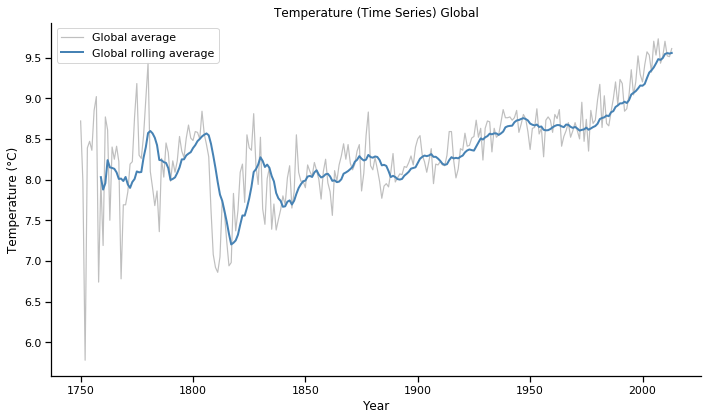

In [25]:
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data_plot, label = "Global average", alpha = 0.5,
                 color = "grey", lw = 1.2)
    sns.lineplot(x = "year", y = "rollingAverage", data = df_global_data_plot, label = "Global rolling average",
                 color = "steelblue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("Temperature (°C)")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("Temperature (Time Series) Global")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

Text(0.5, 1.0, "Rolling Standard Deviation for the Global 'avg_temp' data")

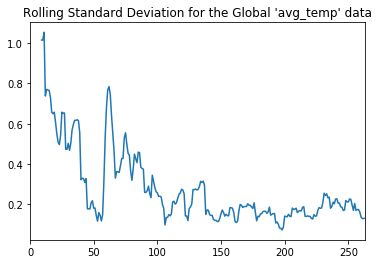

In [27]:
#calculate the rolling standard deviaton for the global_data dataframe and plot it
df_global_data_plot["avg_temp"].rolling(window = avg_num).std().plot()

#set the title for the plot
plt.title("Rolling Standard Deviation for the Global 'avg_temp' data")

In [0]:
def prepare_df(cities, avg_num = 10):
    
    #create empty dict
    results = {}    
    
    #loop for all city names
    for x in cities:
        #selecting dataframe for the chosen city and years bigger or equal 1750 and smaller 2014 (for consistency)
        df_x = df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] >= 1750) &
                            (df_city_data["year"] < 2014)].copy()
        
        #calculate rolling average with window = avg_num
        df_x["rollingAverage"] = df_x["avg_temp"].rolling(window = avg_num).mean()
        
        #calculating the trend
        try:
            #loading the model
            trend_model = LinearRegression()
            
            #define x and y values
            X = df_x[["year"]]
            y = df_x[["avg_temp"]]
            
            #fit the values to the model
            trend_model.fit(X, y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x["trend"] = trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
                       
        except:
            #in case of NaN Values 
            print("Could not calculate trend.")
        
        finally:
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x] = df_x    
    
    for x in results:
        #print the average temperature from 1750 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1750 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'More {x} values: Max: {results[x]["avg_temp"].max():.2f} °C; Min: {results[x]["avg_temp"].min():.2f} °C \n')
    #copy the global data for years < 2014
    df_global = df_global_data[df_global_data["year"] < 2014].copy()
    
    #caluclating the trend line as described above (I could also do this one time outside this function, but in case I 
    #would had to change the global data somehow I put it in here - also I started with the functionality to choose the timescale.)
    try:
        trend_model = LinearRegression()
        X = df_global["year"]
        trend_model.fit(X = df_global[["year"]], y = df_global[["avg_temp"]])
        trend_plot = trend_model.predict(df_global[["year"]])
        df_global["trend"] = trend_plot
        print(f"Global slope: {trend_model.coef_}")
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global["rollingAverage"] = df_global["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global

        print(f'The global average temperature (1750 - 2013) is: {df_global["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global["avg_temp"].max():.2f} °C; Min: {df_global["avg_temp"].min():.2f} °C')
        #return the dict
        return results

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
    
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "rollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if global_plot = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")

            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "rollingAverage", data = result[x], label = x, alpha = opac)
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling Avg. Temperature (°C)")
        ax.set_xlabel("Year")
        ax.set_title("Temperature Time Series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()  

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


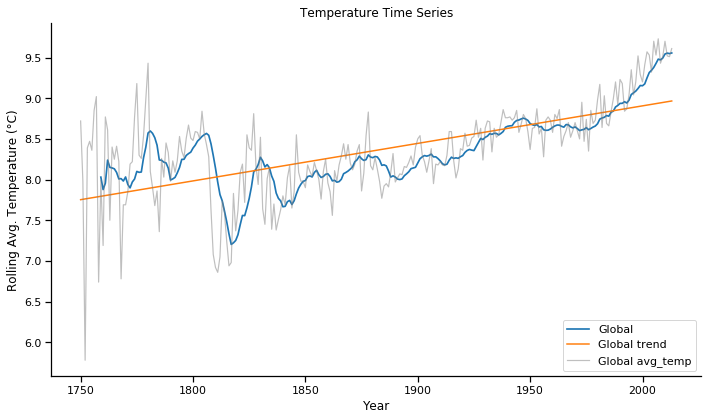

In [29]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prepare_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


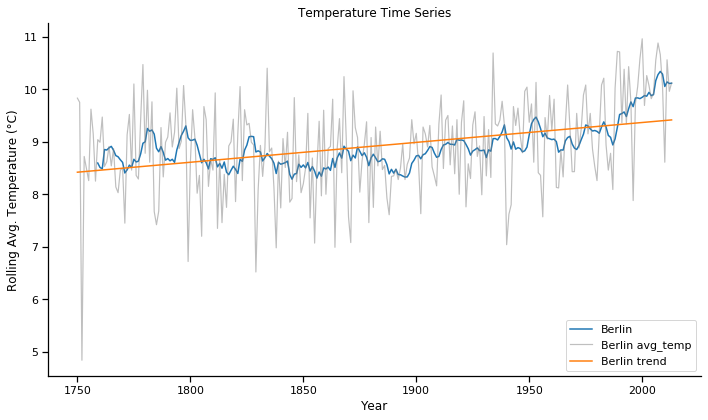

In [30]:
cities = ["Berlin"]
plot_results(prepare_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)

Text(0.5, 1.0, "Rolling Standard Deviation for the Berlin 'avg_temp' data")

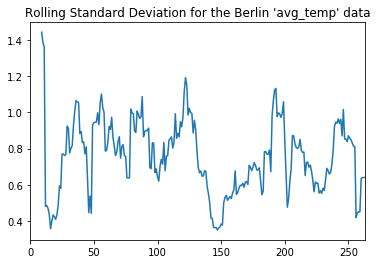

In [31]:
df_berlin["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling Standard Deviation for the Berlin 'avg_temp' data")

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


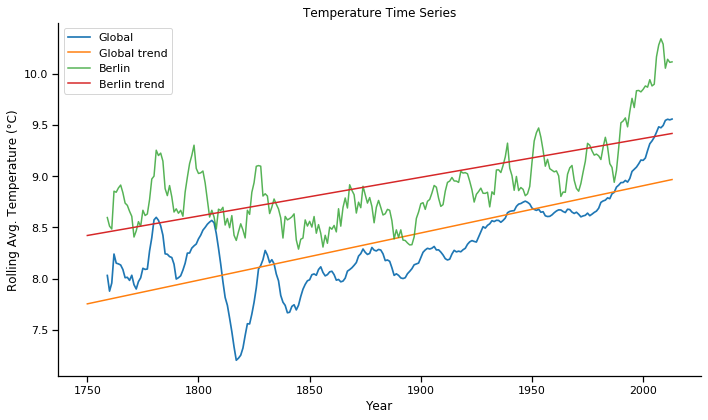

In [32]:
cities = ["Berlin"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

In [33]:
#calculating the correlation between the berlin avg_temp and the global avg_temp
df_berlin[["avg_temp"]].corrwith(df_global_data_plot["avg_temp"])

avg_temp    0.515946
dtype: float64

Berlin slope: [[0.00378471]]
Hamburg slope: [[0.0038572]]
Munich slope: [[0.00355448]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


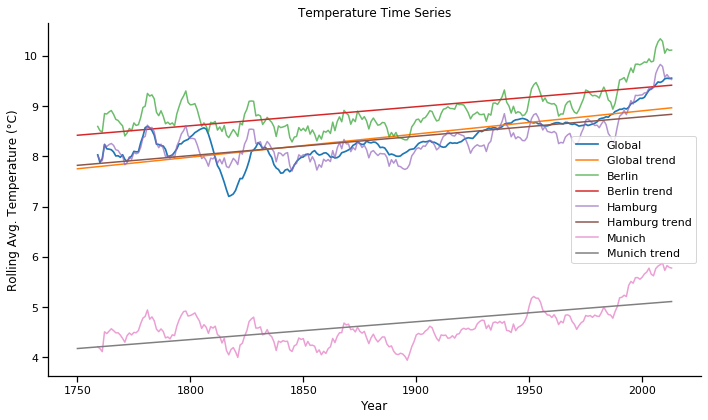

In [34]:
cities = "Berlin Hamburg Munich".split()
plot_results(prepare_df(cities), opac = 0.7, trend=True)

In [35]:
#getting the avg_temp data for Berlin and Munich in the year 2013
for x in ["Berlin", "Munich"]:
    print(f'{x}: {df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] == 2013)]["avg_temp"]}')

Berlin: 9260    10.12
Name: avg_temp, dtype: float64
Munich: 44264    6.0
Name: avg_temp, dtype: float64


Hamburg slope: [[0.0038572]]
The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


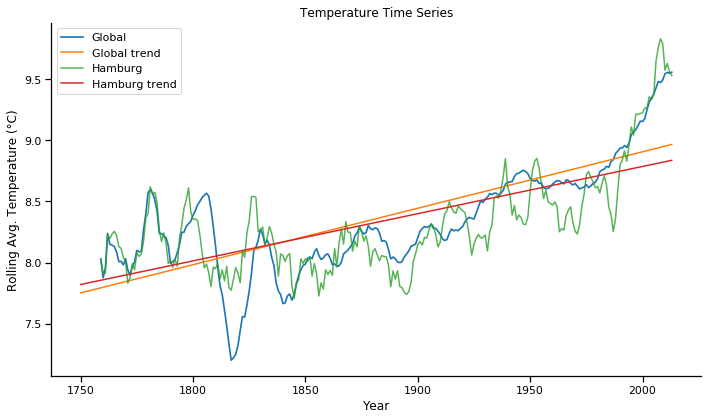

In [36]:
cities = ["Hamburg"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

Berlin slope: [[0.00378471]]
Hamburg slope: [[0.0038572]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


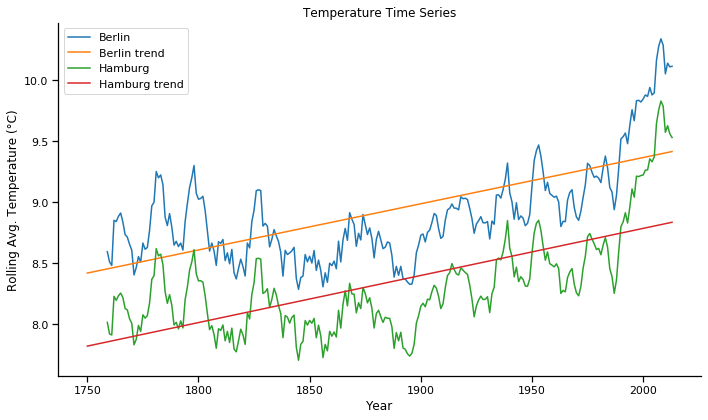

In [37]:
cities = ["Berlin", "Hamburg"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

In [38]:
#calculating the correlation between the Berlin avg_temp and the Hamburg avg_temp
prepare_df(["Berlin"])["Berlin"][["avg_temp"]].corrwith(prepare_df(["Hamburg"])["Hamburg"]["avg_temp"])

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Hamburg slope: [[0.0038572]]
The average temperature in Hamburg (1750 - 2013) is: 8.33 °C
More Hamburg values: Max: 10.37 °C; Min: 4.65 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.982435
dtype: float64

Munich slope: [[0.00355448]]
The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


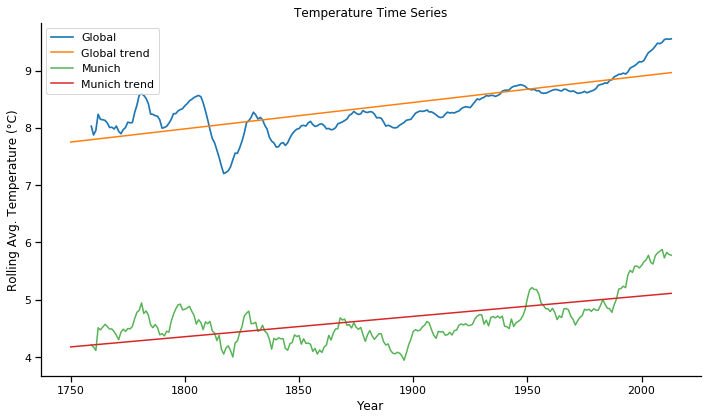

In [39]:
cities = ["Munich"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

Berlin slope: [[0.00378471]]
Munich slope: [[0.00355448]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


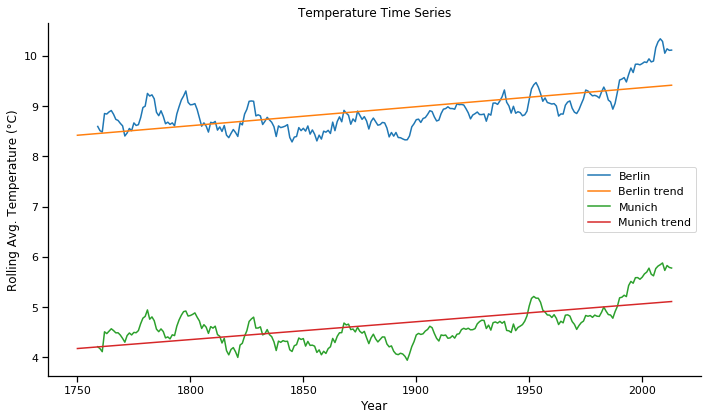

In [40]:
cities = ["Berlin", "Munich"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

In [41]:
#calculating the correlation between the Berlin avg_temp and the Munich avg_temp
prepare_df(["Berlin"])["Berlin"][["avg_temp"]].corrwith(prepare_df(["Munich"])["Munich"]["avg_temp"])

Berlin slope: [[0.00378471]]
The average temperature in Berlin (1750 - 2013) is: 8.92 °C
More Berlin values: Max: 10.96 °C; Min: 4.84 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Munich slope: [[0.00355448]]
The average temperature in Munich (1750 - 2013) is: 4.64 °C
More Munich values: Max: 6.64 °C; Min: 0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.903686
dtype: float64

In [43]:
#check for duplicates among the city column
cities = df_city_data.groupby(["city", "country"], as_index = False).count()["city"]
cities[cities.duplicated()]

10        Alexandria
34         Barcelona
46        Birmingham
72           Colombo
126        Hyderabad
157         Kingston
164           La Paz
175           London
178      Los Angeles
281         Santiago
282         Santiago
284    Santo Domingo
324         Valencia
Name: city, dtype: object

In [0]:
#creating the key by joining the city and country column
df_city_data["key"] = df_city_data[["city", "country"]].apply(lambda x: " - ".join(x), axis=1)

In [45]:
df_city_data.head()

,year,city,country,avg_temp,key
0,1849,Abidjan,Côte D'Ivoire,25.58,Abidjan - Côte D'Ivoire
1,1850,Abidjan,Côte D'Ivoire,25.52,Abidjan - Côte D'Ivoire
2,1851,Abidjan,Côte D'Ivoire,25.67,Abidjan - Côte D'Ivoire
3,1852,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire
4,1853,Abidjan,Côte D'Ivoire,NaN,Abidjan - Côte D'Ivoire


In [0]:
def calc_corr(cities, startYear):
    
    #creating an empty dictionary
    corr = {}    
    
    for x in cities:
        #selecting and copying the correct dataframe given different conditions
        df_x = df_city_data[(df_city_data["key"] == x) & (df_city_data["year"] >= startYear) & (df_city_data["year"] <= 2015)].copy()
        #reset the index to align the index of both dataframes
        df_x.reset_index(inplace = True)
        #calculate the correlation and add the result to the dictionary
        corr[x] = df_x[["avg_temp"]].corrwith(df_global_data["avg_temp"], axis = 0)
        
    #return the dictionary    
    return corr

In [0]:
corr_all = calc_corr(df_city_data["key"].unique(), 1750)
df_corr = pd.DataFrame(corr_all)
df_corr = df_corr.transpose().sort_values("avg_temp", ascending = False)
df_corr.reset_index(inplace = True)
df_corr["city"] = df_corr["index"].apply(lambda x: x.split(" - ")[0])
df_corr["country"] = df_corr["index"].apply(lambda x: x.split(" - ")[1])
df_corr.set_index("city", inplace = True)

In [48]:
df_corr.head()

,index,avg_temp,country
city,,,
Ufa,Ufa - Russia,0.763481,Russia
Tunis,Tunis - Tunisia,0.739872,Tunisia
Valencia,Valencia - Spain,0.721943,Spain
Montreal,Montreal - Canada,0.721534,Canada
Ottawa,Ottawa - Canada,0.718663,Canada


In [49]:
#choosing the german cities out of the new dictionary
print(df_corr.loc[["Berlin", "Hamburg", "Munich"]]["avg_temp"])
#print(sum(df_city_data[df_city_data["city"] == "Munich"]["avg_temp"].isna()))

city
Berlin     0.515946
Hamburg    0.512275
Munich     0.559655
Name: avg_temp, dtype: float64


In [50]:
df_corr[["avg_temp", "country"]].head(5)

,avg_temp,country
city,,
Ufa,0.763481,Russia
Tunis,0.739872,Tunisia
Valencia,0.721943,Spain
Montreal,0.721534,Canada
Ottawa,0.718663,Canada


In [51]:
df_corr[["avg_temp", "country"]][df_corr["avg_temp"] < 0.01].head(5)

,avg_temp,country
city,,
Ouagadougou,0.005583,Burkina Faso
Lagos,0.002495,Nigeria
Luanda,0.001921,Angola
Maseru,0.001244,Lesotho
Monrovia,-0.001666,Liberia


In [52]:
df_corr[["avg_temp", "country"]].tail(5)

,avg_temp,country
city,,
Asmara,-0.083861,Eritrea
Guayaquil,-0.088970,Ecuador
Harare,-0.095168,Zimbabwe
Maiduguri,-0.103415,Nigeria
Kano,-0.115508,Nigeria


Could not calculate trend.
Maseru slope: [[0.0080434]]
Could not calculate trend.
The average temperature in Ufa (1750 - 2013) is: 1.81 °C
More Ufa values: Max: 5.00 °C; Min: -5.96 °C 

The average temperature in Maseru (1750 - 2013) is: 14.04 °C
More Maseru values: Max: 15.34 °C; Min: 13.02 °C 

The average temperature in Kano (1750 - 2013) is: 26.12 °C
More Kano values: Max: 27.76 °C; Min: 22.60 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


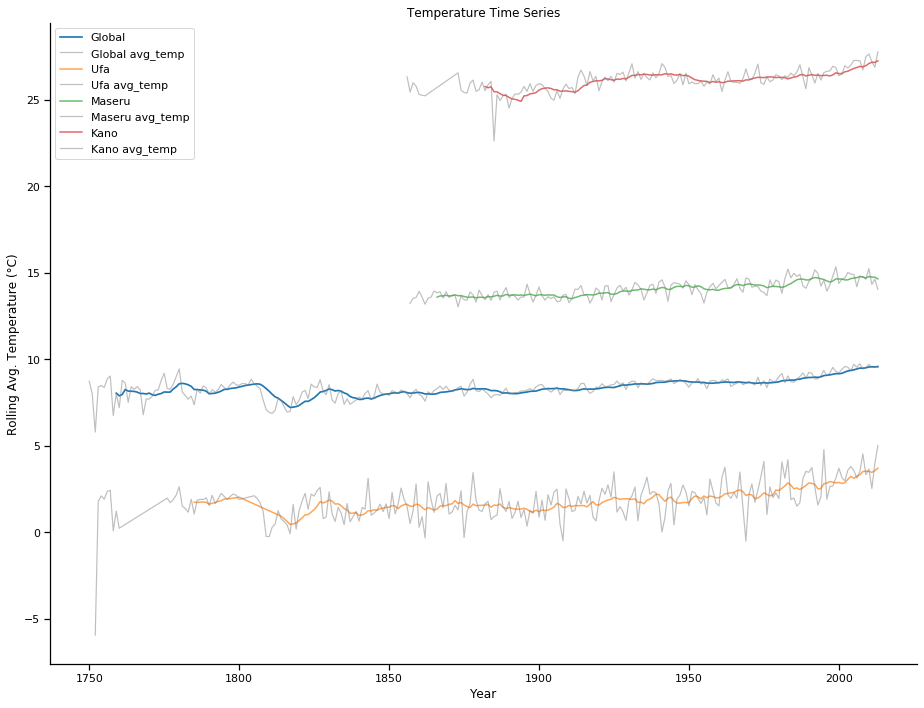

In [53]:
cities = ["Ufa", "Maseru", "Kano"]
plot_results(prepare_df(cities), (13,10), show_normal=True)

Could not calculate trend.
The average temperature in Ufa (1750 - 2013) is: 1.81 °C
More Ufa values: Max: 5.00 °C; Min: -5.96 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


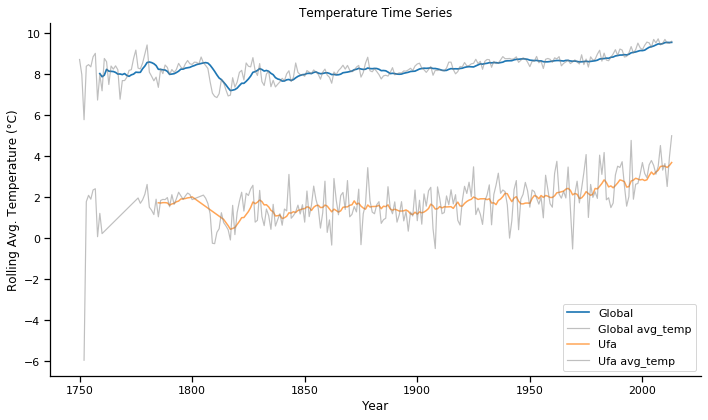

In [54]:
cities = ["Ufa"]
plot_results(prepare_df(cities), show_normal=True)

Maseru slope: [[0.0080434]]
The average temperature in Maseru (1750 - 2013) is: 14.04 °C
More Maseru values: Max: 15.34 °C; Min: 13.02 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


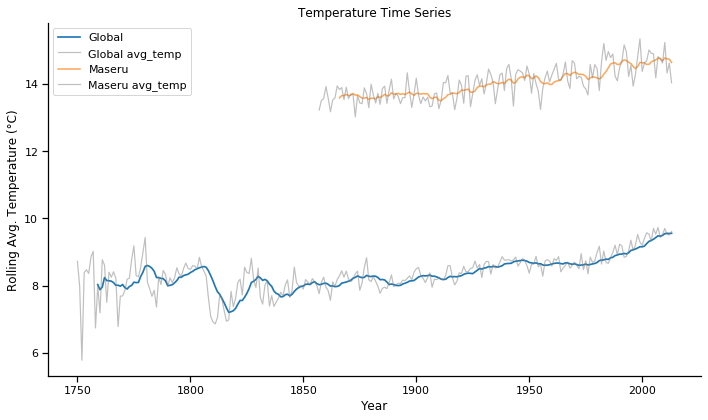

In [55]:
cities = ["Maseru"]
plot_results(prepare_df(cities), show_normal=True)

Could not calculate trend.
The average temperature in Kano (1750 - 2013) is: 26.12 °C
More Kano values: Max: 27.76 °C; Min: 22.60 °C 

Global slope: [[0.00461111]]
The global average temperature (1750 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


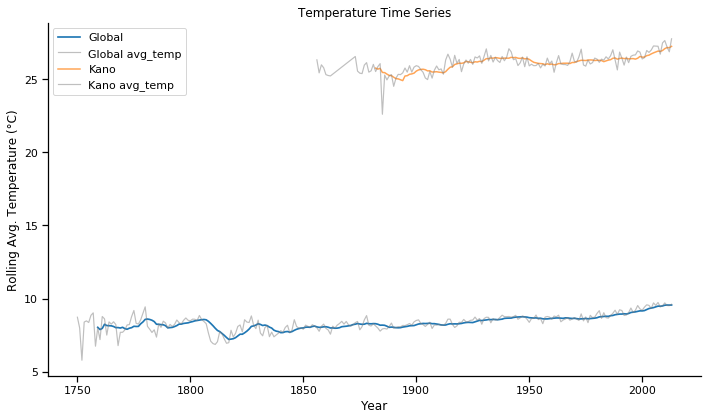

In [56]:
cities = ["Kano"]
plot_results(prepare_df(cities), show_normal=True)

**There is a clear overall uptrend visible, i. e., the average global temperature is increasing, with an also increasing tempo.**

The german cities Hamburg, Berlin and Munich got compared to the global data (1750 - 2013):
* the slope of the global trend is higher than compared to the german cities, so the global average temperature is increasing faster (looking at this long time period)
* Berlin has the highest average temperature among the german cities, making Berlin the only city that has a higher average temperature than the global
* Hamburg is the closest to the global average temperature, while Munich has the lowest average temperature, but also the highest correlation to the global data compared to the other two german cities

